In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats

In [2]:
from io import StringIO

data_csv = StringIO(
    """
date,id,target,measure
2023-01-01,1,0,1
2023-02-01,1,0,1
2023-03-01,1,0,2
2023-04-01,1,1,2
"""
)

df = pd.read_csv(data_csv, parse_dates=["date"])
df.head()

,date,id,target,measure
0,2023-01-01,1,0,1
1,2023-02-01,1,0,1
2,2023-03-01,1,0,2
3,2023-04-01,1,1,2


(0.0, 5.0)

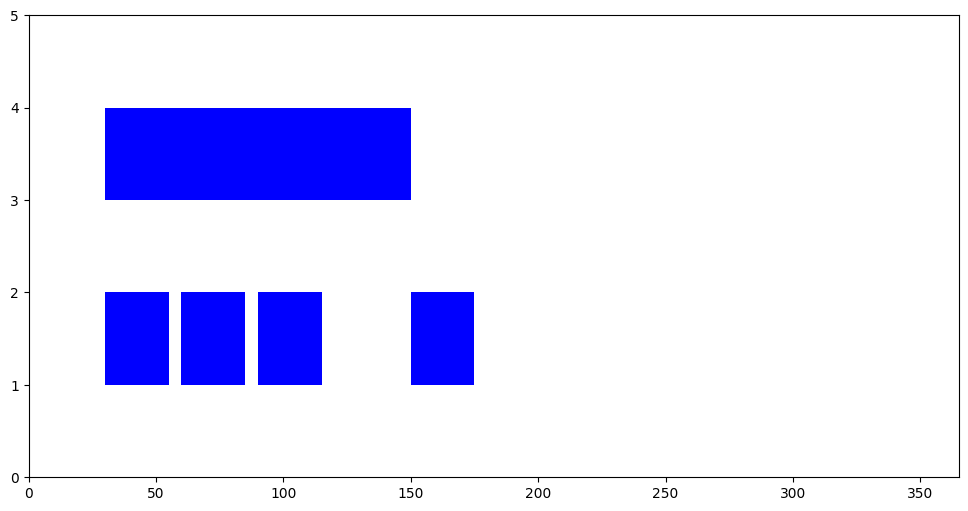

In [ ]:
# basics
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

bar_width = 25
bar_height = 1

ax.broken_barh(
    [(30, bar_width), (60, bar_width), (90, bar_width), (150, bar_width)],
    (1, bar_height),
    facecolors="blue",
)
ax.broken_barh(
    [(30, 150 - 30)],
    (3, bar_height),
    facecolors="blue",
)

ax.set_xlim(0, 365)
ax.set_ylim(0, 5)

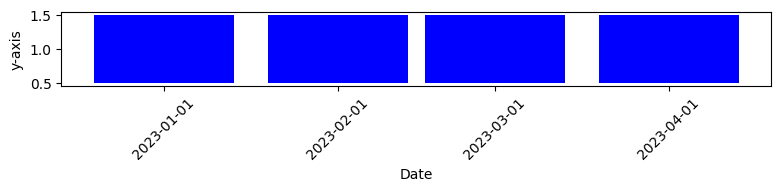

In [41]:
# dates
fig, ax = plt.subplots(figsize=(8, 2))

bar_width = 25

for _, row in df.iterrows():
    ax.broken_barh(
        [(row["date"].toordinal() - bar_width / 2, bar_width)],
        (1 - 0.5, 1),
        facecolors="blue",
    )

ax.set_xlabel("Date")
ax.set_xticks([x.toordinal() for x in df["date"].unique()])
ax.set_xticklabels([x.strftime("%Y-%m-%d") for x in df["date"].unique()], rotation=45)

ax.set_ylabel("y-axis")
# ax.set_yticks([1])
# ax.set_yticklabels(df['id'].unique())

plt.tight_layout()

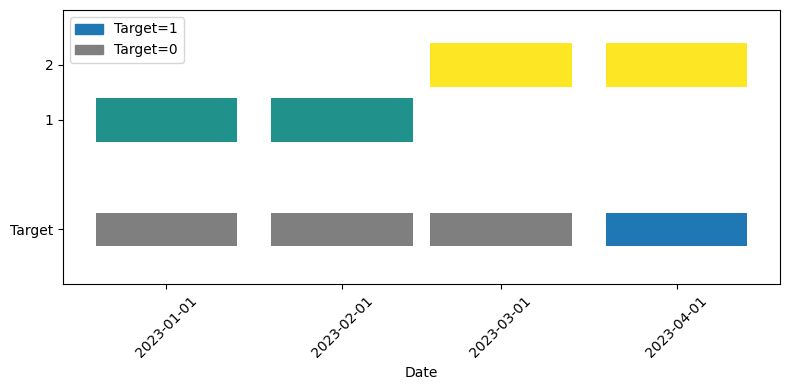

In [42]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(8, 4))

bar_width = 25

# Plot each observation as a rectangle, y axis is measure
for _, row in df.iterrows():
    # Main measure bar
    ax.broken_barh(
        [(row["date"].toordinal() - bar_width / 2, bar_width)],
        (row["measure"] - 0.4, 0.8),
        facecolors=plt.cm.viridis(row["measure"] / df["measure"].max()),
        label="Measure" if _ == 0 else None,
    )
    # Target status bar at special y=-1
    ax.broken_barh(
        [(row["date"].toordinal() - bar_width / 2, bar_width)],
        (-1 - 0.3, 0.6),
        facecolors="tab:blue" if row["target"] else "tab:gray",
        label=None,
    )

# Set y-ticks: add special "Target" level at the bottom
yticks = [-1] + sorted(df["measure"].unique())
yticklabels = ["Target"] + [str(m) for m in sorted(df["measure"].unique())]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

ax.set_xlabel("Date")
ax.set_ylabel("")

ax.set_xticks([d.toordinal() for d in df["date"]])
ax.set_xticklabels(df["date"].dt.strftime("%Y-%m-%d"), rotation=45)

# Make ylim larger for clarity
ax.set_ylim(-2, max(df["measure"]) + 1)

# Add legends
# measure_patch = mpatches.Patch(color=plt.cm.viridis(0.8), label='Measure')
target_patch = mpatches.Patch(color="tab:blue", label="Target=1")
notarget_patch = mpatches.Patch(color="tab:gray", label="Target=0")
ax.legend(handles=[target_patch, notarget_patch], loc="upper left")

plt.tight_layout()